In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/sample_data/SolarPrediction.csv"
data = pd.read_csv(file_path)




In [5]:
# Convert necessary columns to datetime format
data["TimeSunRise"] = pd.to_datetime(data["TimeSunRise"], format="%H:%M:%S", errors="coerce")
data["TimeSunSet"] = pd.to_datetime(data["TimeSunSet"], format="%H:%M:%S", errors="coerce")
data["Data"] = pd.to_datetime(data["Data"], format="%m/%d/%Y %I:%M:%S %p", errors="coerce")
data["Time"] = pd.to_datetime(data["Time"], format="%H:%M:%S", errors="coerce")



In [6]:
# Feature Engineering
data["TSR_Minute"] = data["TimeSunRise"].dt.minute
data["TSS_Minute"] = data["TimeSunSet"].dt.minute
data["TSS_Hour"] = np.where(data["TimeSunSet"].dt.hour == 18, 1, 0)

data["Month"] = data["Data"].dt.month
data["Day"] = data["Data"].dt.day
data["Hour"] = data["Time"].dt.hour
data["Minute"] = data["Time"].dt.minute
data["Second"] = data["Time"].dt.second



In [7]:
# Binning the data
data["WindDirection(Degrees)_bin"] = np.digitize(data["WindDirection(Degrees)"], np.arange(0, 360, 20).tolist())
data["TSS_Minute_bin"] = np.digitize(data["TSS_Minute"], np.arange(0, 60, 5).tolist())
data["Humidity_bin"] = np.digitize(data["Humidity"], np.arange(0, 100, 10).tolist())



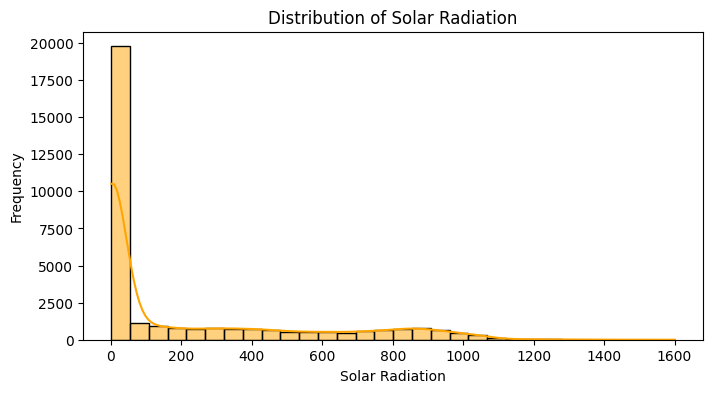

In [8]:
# Plot Solar Radiation Distribution
plt.figure(figsize=(8, 4))
sns.histplot(data["Radiation"], bins=30, kde=True, color="orange")
plt.title("Distribution of Solar Radiation")
plt.xlabel("Solar Radiation")
plt.ylabel("Frequency")
plt.show()



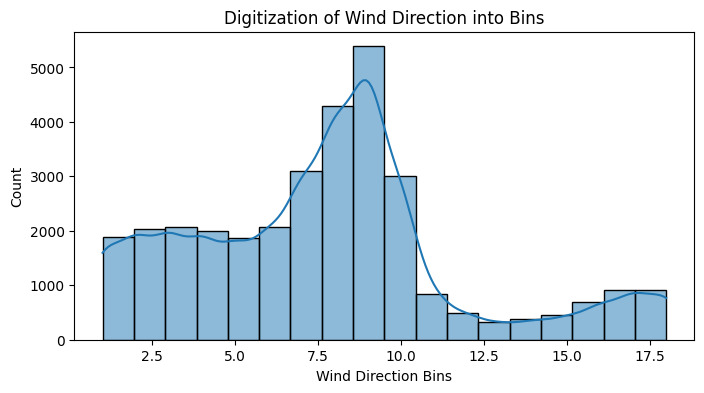

In [9]:
# Plot Wind Direction Bins
plt.figure(figsize=(8, 4))
sns.histplot(data["WindDirection(Degrees)_bin"], bins=18, kde=True)
plt.title("Digitization of Wind Direction into Bins")
plt.xlabel("Wind Direction Bins")
plt.ylabel("Count")
plt.show()



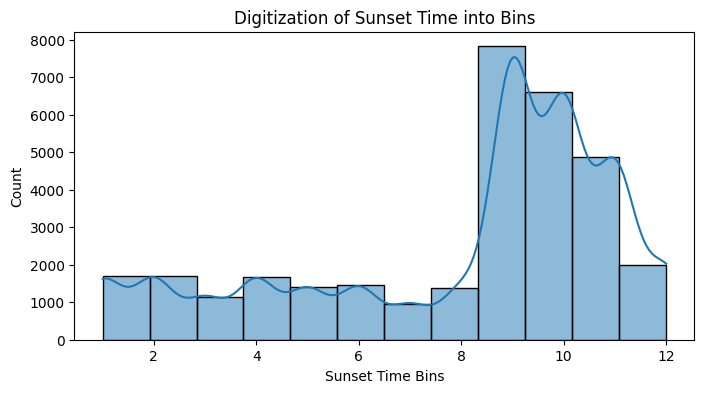

In [10]:
# Plot Sunset Time Bins
plt.figure(figsize=(8, 4))
sns.histplot(data["TSS_Minute_bin"], bins=12, kde=True)
plt.title("Digitization of Sunset Time into Bins")
plt.xlabel("Sunset Time Bins")
plt.ylabel("Count")
plt.show()




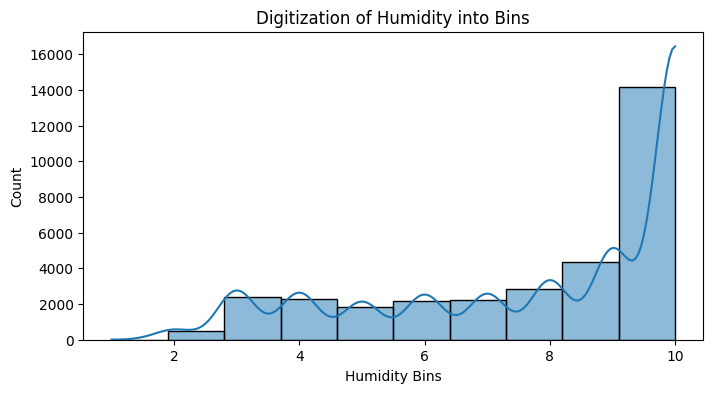

In [11]:
# Plot Humidity Bins
plt.figure(figsize=(8, 4))
sns.histplot(data["Humidity_bin"], bins=10, kde=True)
plt.title("Digitization of Humidity into Bins")
plt.xlabel("Humidity Bins")
plt.ylabel("Count")
plt.show()



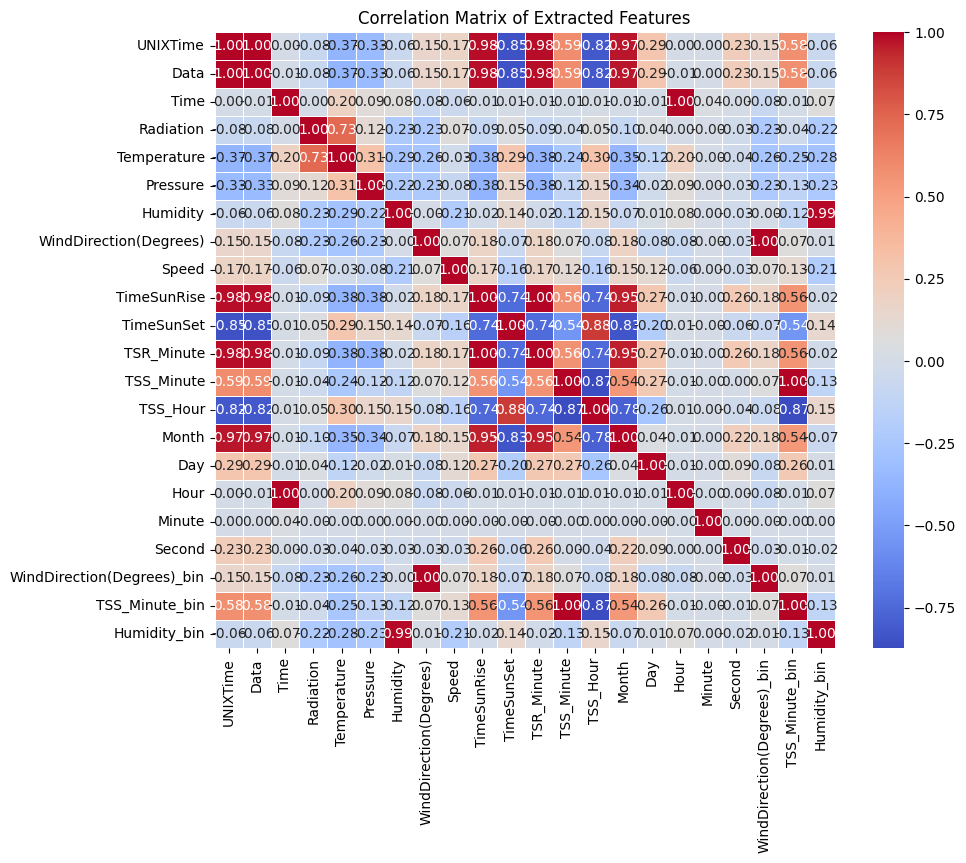

In [12]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Extracted Features")
plt.show()



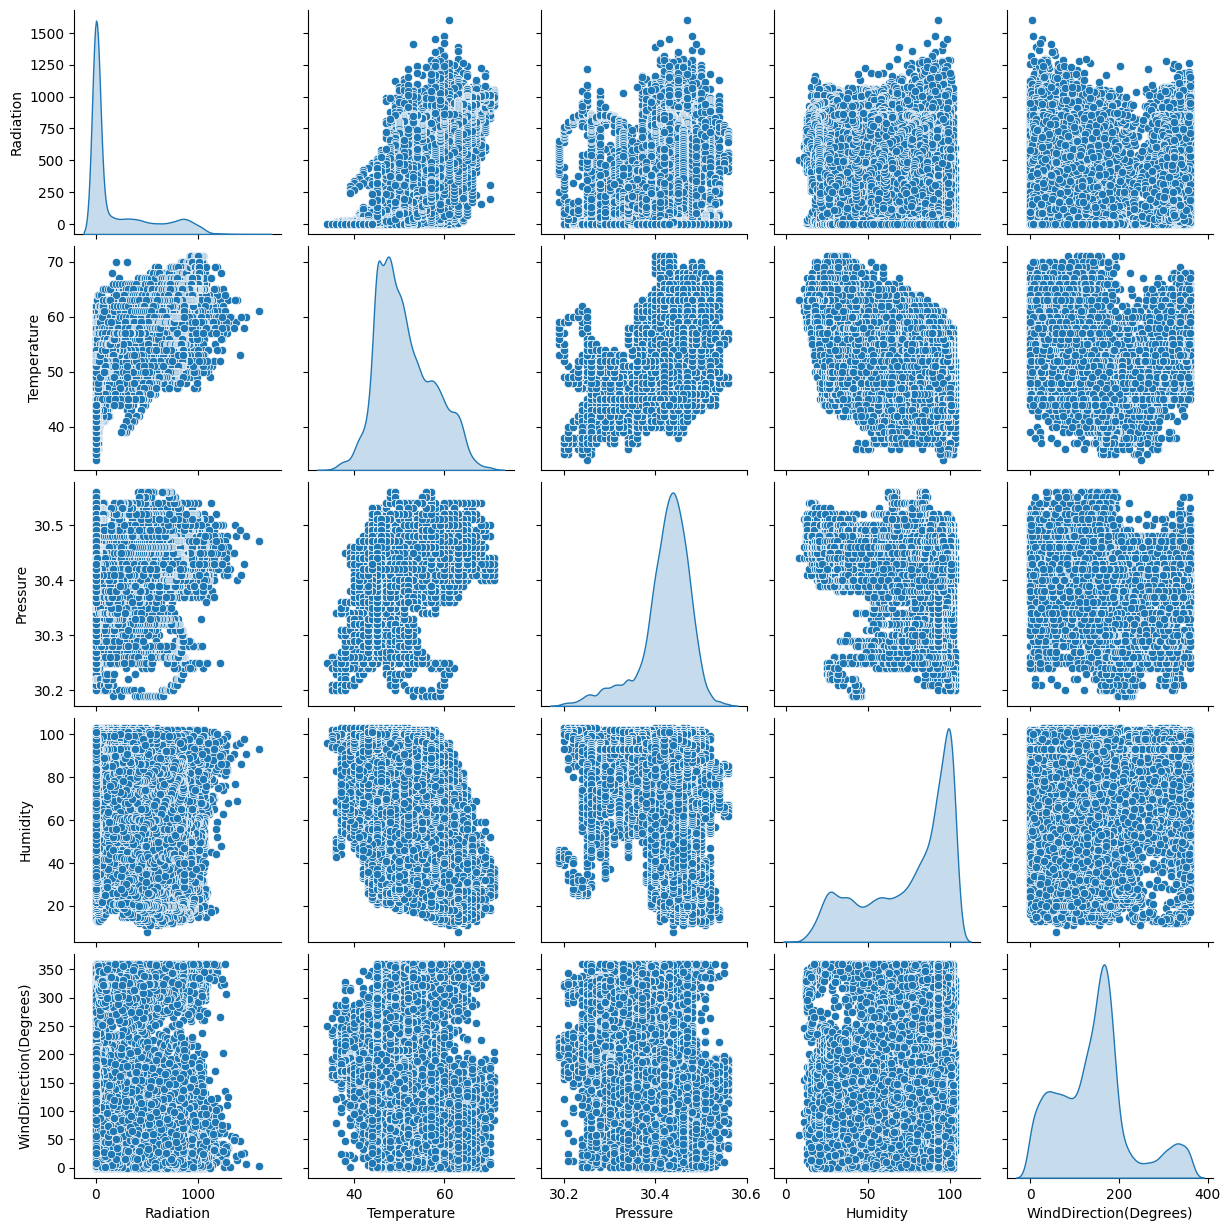

In [13]:
# Pairplot to visualize relationships between key numerical features
selected_features = ["Radiation", "Temperature", "Pressure", "Humidity", "WindDirection(Degrees)"]
sns.pairplot(data[selected_features], diag_kind="kde")
plt.show()



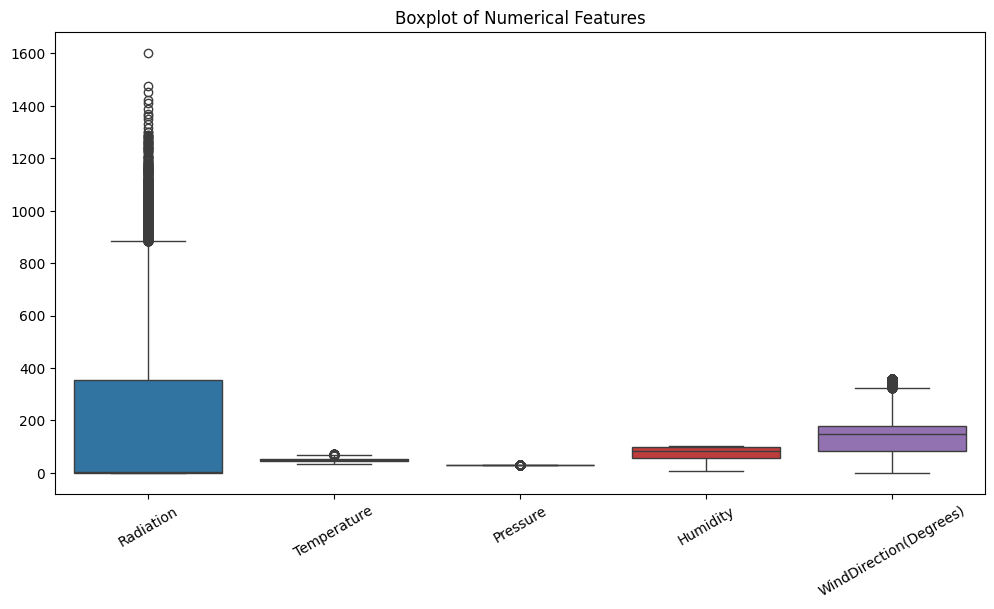

In [14]:
# Boxplots to check for outliers in numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[selected_features])
plt.xticks(rotation=30)
plt.title("Boxplot of Numerical Features")
plt.show()



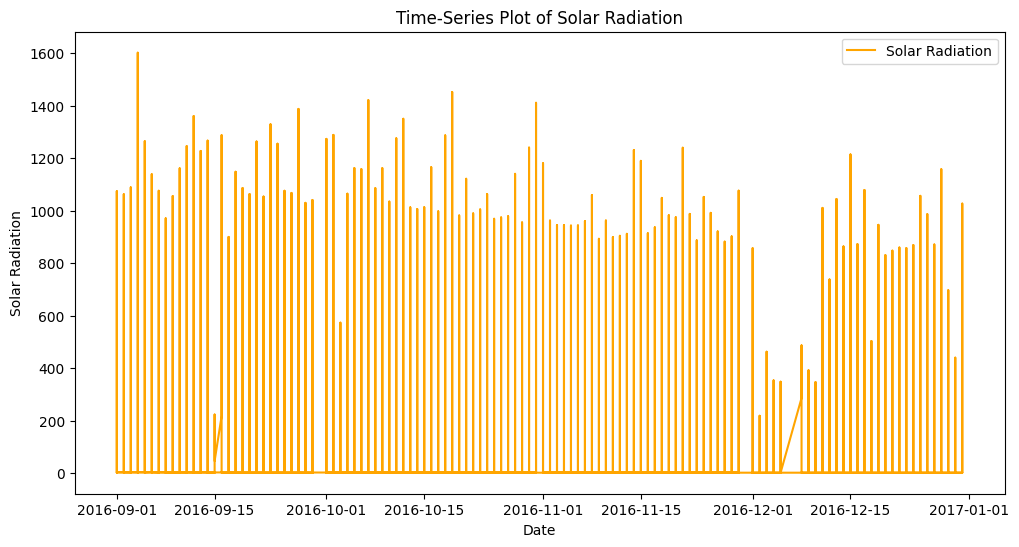

In [15]:
# Time series plot of Solar Radiation over time
plt.figure(figsize=(12, 6))
plt.plot(data["Data"], data["Radiation"], label="Solar Radiation", color="orange")
plt.xlabel("Date")
plt.ylabel("Solar Radiation")
plt.title("Time-Series Plot of Solar Radiation")
plt.legend()
plt.show()